In [ ]:
# If not already installed
!pip install tensorflow tensorflow-datasets

# Imports
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load training and testing data
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


In [ ]:
# Normalize and shift labels from 1–26 → 0–25
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = label - 1
    return image, label

# Apply normalization and batching
ds_train = ds_train.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 letters A-Z
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(ds_train, validation_data=ds_test, epochs=5)


Epoch 1/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 79s 111ms/step - accuracy: 0.6808 - loss: 1.0844 - val_accuracy: 0.8720 - val_loss: 0.3873
Epoch 2/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 75s 101ms/step - accuracy: 0.8973 - loss: 0.3162 - val_accuracy: 0.8954 - val_loss: 0.3211
Epoch 3/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 70s 100ms/step - accuracy: 0.9179 - loss: 0.2445 - val_accuracy: 0.9054 - val_loss: 0.2895
Epoch 4/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9306 - loss: 0.2055 - val_accuracy: 0.9088 - val_loss: 0.2789
Epoch 5/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9379 - loss: 0.1794 - val_accuracy: 0.9111 - val_loss: 0.2731


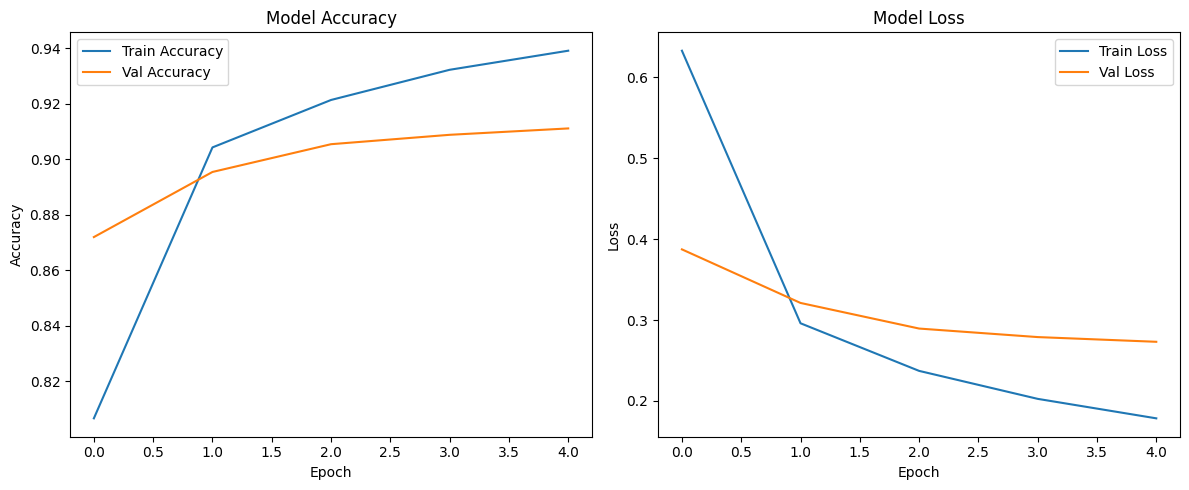

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


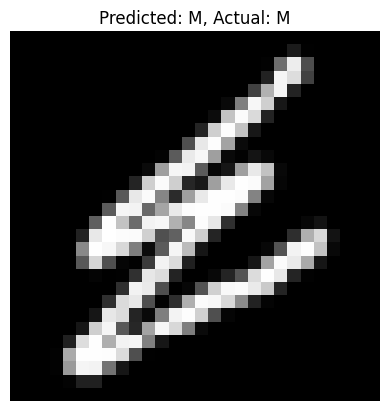

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


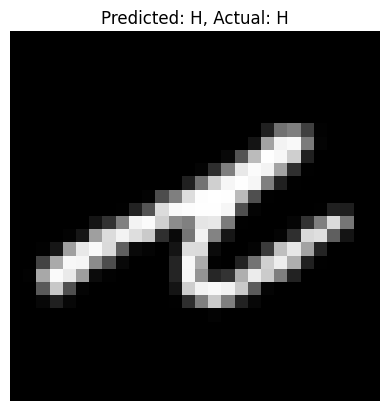

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


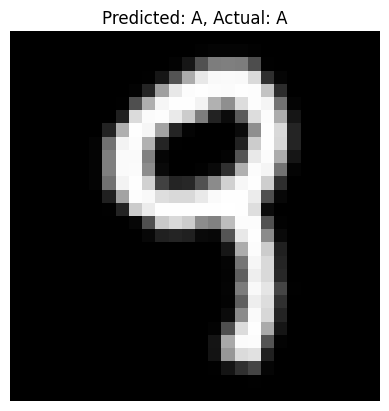

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


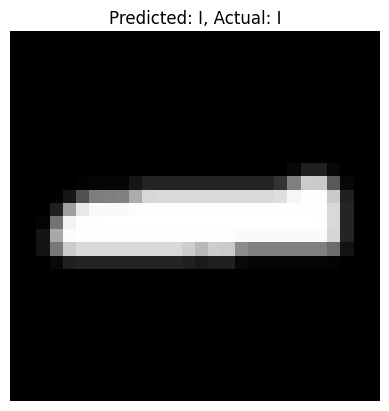

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


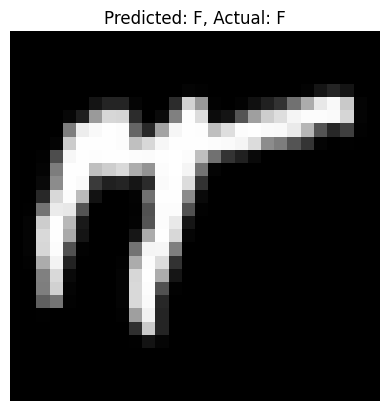

In [ ]:
# Convert batched dataset to individual samples
ds_test_unbatched = ds_test.unbatch()

# Define A–Z labels
letters = [chr(i) for i in range(65, 91)]  # A-Z

# Predict and display 5 samples
for image, label in ds_test_unbatched.take(5):
    pred = model.predict(tf.expand_dims(image, axis=0))
    pred_class = np.argmax(pred)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {letters[pred_class]}, Actual: {letters[label.numpy()]}")
    plt.axis('off')
    plt.show()
